# Isotropic part of the Hamiltonian of the V15 magnetic claster

Consider the Hamiltonian:

$H=\sum_\limits{i,j}J_{i,j}\vec{S}_i \cdot\vec{S}_j$.

With $J_{i,j}$ from the paper: N. P. Konstantinidis and D. Coffey, Phys. Rev. B 66, 174426 (2002)

# Momentum optimmizer

## Preamble





In [8]:
%tensorflow_version 2.x

# # memory footprint support libraries/code
# !ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
# !pip install gputil
# !pip install psutil
# !pip install humanize

# import psutil
# import humanize
import os
# import GPUtil as GPU


# def check_mem():
#     GPUs = GPU.getGPUs()
#     # XXX: only one GPU on Colab and isn’t guaranteed
#     gpu = GPUs[0]

#     process = psutil.Process(os.getpid())
#     print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), 
#           " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
    
#     print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, 
#                                                                                                 gpu.memoryUsed, 
#                                                                                                 gpu.memoryUtil*100, 
#                                                                                                 gpu.memoryTotal))

# print(end="\n\n")
# check_mem()

from google.colab import drive
drive.mount('/content/drive')

current_location = '/content/drive/My Drive/Coursework program/Examples/v15_isotropic'

assert os.path.exists(current_location), current_location + ' is not exists'

os.chdir(current_location)
print('Current location:', current_location)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current location: /content/drive/My Drive/Coursework program/Examples/v15_isotropic


## Code to training

Considering the operator: {'V15Isotropic': {'J': 800.0, 'J1': 225.0, 'J2': 350.0}}
Using the sampler: {'MetropolisHastings': {'nflips': 1, 'nmoves': 150000, 'nsweeps': 10000, 'sweepfactor': 1.0, 'thermfactor': 0.1}}
Using the optimizer: {'Momentum': {'learning_rate': 5e-05, 'schedule_multiplier': 'fixed', 'momentum_factor': 0.9, 'SR': False, 'L2': {'L2_factor': 0.0001}}}


Start training...
{'Iteration': 1, 'sampler results': {'acceptance': 0.9983466666666667, 'energy error': 13.711192470665944, 'energy mean': -2901.0299390457512, 'nacceptance': 149752, 'taucorr': 0.6167141366105714}, 'Time left': '37 min 21 s'}
{'Iteration': 2, 'sampler results': {'acceptance': 0.9973066666666667, 'energy error': 10.418827507653296, 'energy mean': -2911.485583865554, 'nacceptance': 149596, 'taucorr': 0.37081549139464715}, 'Time left': '36 min 51 s'}
{'Iteration': 3, 'sampler results': {'acceptance': 0.99576, 'energy error': 12.979924521600832, 'energy mean': -2901.7270316225804, 'nacceptance': 149364,

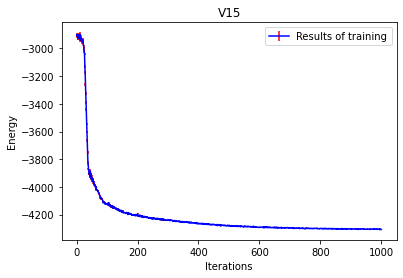

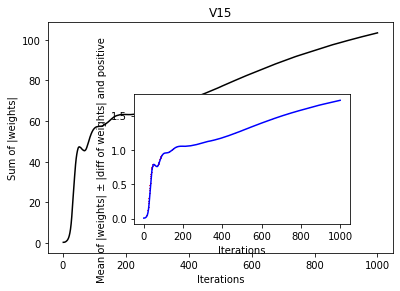

In [11]:
os.chdir(os.path.dirname(os.path.dirname(current_location) ) )
import ground
import ground.logging.plot as plot
os.chdir(current_location)

# enter the seed for the pseudo-random generator for constancy of results
seed = 3141592654
ground.randomizer.seed(seed)

# create a Neural-network Quantum States (NQS)
nqs = ground.machine.Nqs(n_visible=15, alpha=2)

# create a operator
v15_isotropic = ground.operator.V15Isotropic(nqs=nqs)

# create a sampler
metropolis_hastings = ground.sampler.MetropolisHastings(
    nqs=nqs, operator=v15_isotropic
)

# create a optimizer using stochastic gradient descent with SR method
momentum = ground.optimizer.Momentum(nqs=nqs, learning_rate=5e-5)
momentum.set_sr_params(SR=False)

# the name of data of the results of training and NQS
filename = "momentum"

# use variational Monte-Carlo method
vmc = ground.qmc.Vmc(nqs=nqs, operator=v15_isotropic,
                     sampler=metropolis_hastings,
                     optimizer=momentum, filename=filename)

# start training
vmc.run(num_iter=1000)

# plot training results
plot.energy_mean(num=1, filename=filename, title="V15")
plot.momentum(num=2, filename=filename, title="V15")

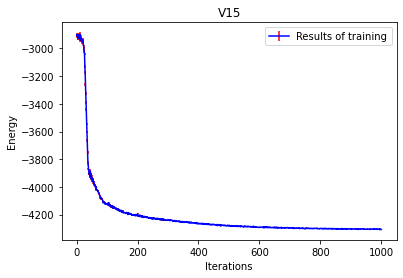

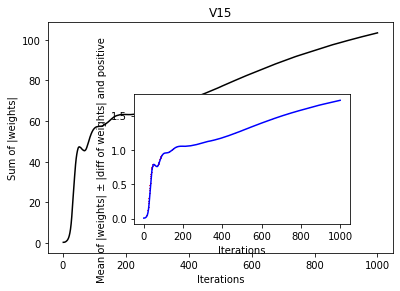

In [12]:
# plot training results
plot.energy_mean(num=1, filename=filename, title="V15")
plot.momentum(num=2, filename=filename, title="V15")